In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.getcwd()

'/dhh19/home/brexit/work/jupyter'

In [2]:
tweets_all = pd.read_msgpack("../../data/continuous_rehydrated/all_tweets_df.msg")

In [3]:
tweets_all.shape

(3941653, 37)

In [4]:
tweets_all.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,...,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1113806432334438400,https://twitter.com/CllrDuncanSmith/status/111...,Thu Apr 04 14:12:01 +0000 2019,2019-04-04 14:12:01+00:00,CllrDuncanSmith,"RT @Domhannigan: I'm back Biking the Border, t...",retweet,None,,None,...,5838,1866,1635,49,"Swords, Ireland",Cllr Duncan Smith,9140,None,http://www.facebook.com/duncansmithswords,False
1,1113806436444921856,https://twitter.com/Bellboy1892/status/1113806...,Thu Apr 04 14:12:02 +0000 2019,2019-04-04 14:12:02+00:00,Bellboy1892,So there is a God 😂 #brexit https://t.co/xUzuL...,quote,None,brexit,None,...,2366,6578,6195,47,Newcastle,Toon Army,25290,None,,False
2,1113806443935825923,https://twitter.com/gilmoremermoz/status/11138...,Thu Apr 04 14:12:04 +0000 2019,2019-04-04 14:12:04+00:00,gilmoremermoz,RT @joannaccherry: Correct. #CooperLetwinBill ...,retweet,None,CooperLetwinBill,None,...,21036,122,163,18,planet earth,brian gilmore,14560,None,http://mermozltd.co.uk,False
3,1113806446754508801,https://twitter.com/CarolJFW/status/1113806446...,Thu Apr 04 14:12:05 +0000 2019,2019-04-04 14:12:05+00:00,CarolJFW,"RT @BenPBradshaw: Just to note, 203 Labour MPs...",retweet,None,Brexit,None,...,8490,940,1324,16,Somewhere in time,Carol Fellingham #FBPE,15423,None,,False
4,1113806449807958023,https://twitter.com/TonysView_com/status/11138...,Thu Apr 04 14:12:05 +0000 2019,2019-04-04 14:12:05+00:00,TonysView_com,Stop #Brexit the roof is leaking 😁😂😂😂,original,None,Brexit,None,...,2042,2078,2374,3,Planet Earth,Tony,6763,None,,False


In [5]:
# Select relevant columns
tweets = tweets_all[['created_at', 'user_screen_name', 'user_location', 'lang', 'text', 'tweet_type', 'hashtags', 'favorite_count', 'retweet_count', 'user_created_at', 'user_name', 'user_verified']]

In [6]:
tweets.tweet_type.value_counts()

retweet     2837139
original     699480
reply        227365
quote        177669
Name: tweet_type, dtype: int64

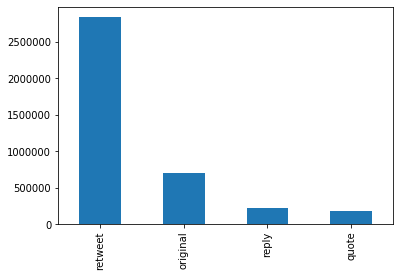

In [7]:
tweets.tweet_type.value_counts().plot.bar()

In [8]:
# select verified tweets
ver_tweets = tweets[(tweets.user_verified.values == True)]
# select unique tweeters and count
len(ver_tweets.user_screen_name.unique())

15529

In [9]:
ver_tweets.shape

(111516, 12)

In [10]:
ver_tweets.head()

,created_at,user_screen_name,user_location,lang,text,tweet_type,hashtags,favorite_count,retweet_count,user_created_at,user_name,user_verified
29,Thu Apr 04 14:12:22 +0000 2019,VirginMedia_One,Ireland,en,RT @VirginMediaNews: The ‘B’ Word: What #Brexi...,retweet,Brexit TheBWord VMNews,0,4,Tue Mar 03 10:47:29 +0000 2009,Virgin Media One,True
68,Thu Apr 04 14:12:47 +0000 2019,merrionstreet,Dublin 2,en,"An Taoiseach, Leo Varadkar greeting German Cha...",original,Brexit,78,20,Tue May 25 15:43:04 +0000 2010,MerrionStreet.ie,True
124,Thu Apr 04 14:11:14 +0000 2019,PeiroClaudia,Argentina,es,RT @AleCiroAlvarez: El #Brexit rompe el status...,retweet,Brexit,0,11,Mon Jan 02 19:52:13 +0000 2012,Claudia Peiro,True
150,Thu Apr 04 14:11:30 +0000 2019,RosieDuffield1,"Canterbury, Kent.",en,My colleague @mdbuckley from @LabPeoplesVote i...,original,Brexit FinalSay PeoplesVote,11,13,Tue May 27 18:31:54 +0000 2014,Rosie Duffield MP,True
170,Thu Apr 04 14:11:46 +0000 2019,WilliamsJon,"Dublin, Ireland",en,Taoiseach welcomes German Chancellor Angela Me...,original,Brexit,2,2,Mon Apr 21 09:56:28 +0000 2008,Jon Williams,True


In [11]:
from itertools import combinations
from collections import Counter

# count hashtag combinations, excludes brexit
def count_hashtag_combinations(total_df):
    pairs = Counter()
    for x in total_df["hashtags"]:
        pairs.update(list(combinations([y for y in filter(lambda i: i!="Brexit" and i != "brexit", x.split())],2)))
    return pairs.most_common(50)

In [12]:
count_hashtag_combinations(ver_tweets)

[(('UK', 'EU'), 327),
 (('MNA_English', 'MNA'), 300),
 (('EU', 'UK'), 176),
 (('May', 'EU'), 151),
 (('EU', 'illner'), 129),
 (('BrexitVote', 'BrexitDeal'), 95),
 (('EUCO', 'Article50'), 95),
 (('EU', 'BrexitVote'), 90),
 (('EU', 'NoDeal'), 90),
 (('Britain', 'MNA_English'), 89),
 (('Britain', 'MNA'), 87),
 (('PeoplesVote', 'PutItToThePeople'), 83),
 (('NoDeal', 'illner'), 81),
 (('EU', 'BrexitDeal'), 79),
 (('UK', 'TheresaMay'), 75),
 (('EU', 'EU'), 75),
 (('EUCO', 'EUelections2019'), 75),
 (('British', 'MNA_English'), 72),
 (('TheresaMay', 'EU'), 71),
 (('British', 'MNA'), 70),
 (('Macron', 'Merkel'), 69),
 (('May', 'Corbyn'), 69),
 (('Merkel', 'EU'), 67),
 (('EuropeanUnion', 'MNA_English'), 63),
 (('EuropeanUnion', 'MNA'), 63),
 (('NoDeal', 'BrexitVote'), 63),
 (('Britain', 'EU'), 61),
 (('Macron', 'EU'), 61),
 (('NoDeal', 'BrexitDeal'), 57),
 (('EU', 'TheresaMay'), 56),
 (('EU', 'May'), 55),
 (('PutItToThePeople', 'PeoplesVote'), 55),
 (('UK', 'MNA_English'), 54),
 (('UK', 'MNA'), 

In [13]:
count_hashtag_combinations(tweets)

[(('EU', 'PeoplesVote'), 8487),
 (('UK', 'EU'), 7983),
 (('PeoplesVote', 'FinalSay'), 6902),
 (('Marr', 'PeoplesVote'), 5911),
 (('Conservative', 'Labour'), 5831),
 (('EU', 'FinalSay'), 5823),
 (('EU', 'UK'), 5762),
 (('EU', 'RevokeArticle50'), 5696),
 (('Conservative', 'TheBrexitParty'), 5134),
 (('Labour', 'TheBrexitParty'), 5017),
 (('PeoplesVote', 'PutItToThePeople'), 4892),
 (('PeoplesVote', 'RevokeArticle50'), 4463),
 (('LeaveMeansLeave', 'FBPE'), 4295),
 (('GTTO', 'FBPE'), 4286),
 (('lbc', 'fbpe'), 4253),
 (('GTTO', 'LeaveMeansLeave'), 4251),
 (('RevokeArticle50', 'PeoplesVote'), 4243),
 (('RevokeArt50', 'NoDeal'), 4093),
 (('TheresaMay', 'BrexitShambles'), 4071),
 (('theresamaystatement', 'RevokeArticle50'), 4057),
 (('StrongAndStable', 'RevokeArticle50'), 4056),
 (('theresamaystatement', 'StrongAndStable'), 4055),
 (('PutItToThePeople', 'PeoplesVote'), 3471),
 (('fbpe', 'conservatives'), 3402),
 (('PeoplesVote', 'BrexitBallot'), 3324),
 (('lbc', 'conservatives'), 3324),
 (('Fi

In [14]:
def count_hashtags(df):
    hashtags = []
    for x in df["hashtags"]:
        hashtags.extend(x.split())
    return hashtags

In [15]:
# count hashtags for verified tweets
hashtag_counts = pd.Series(count_hashtags(ver_tweets)).value_counts()
hashtag_counts[0:100]

Brexit                  83464
brexit                  10087
EU                       3148
UK                       1698
EUCO                     1679
TheresaMay               1503
May                      1431
PeoplesVote              1223
BREXIT                    781
BrexitVote                718
NoDeal                    712
PeoplesVoteMarch          695
UE                        665
Article50                 543
BrexitShambles            522
Europe                    465
Britain                   423
Merkel                    403
RevokeArticle50           390
WithdrawalAgreement       363
London                    349
Labour                    334
BREAKING                  331
PutItToThePeople          330
BrexitDeal                328
backstop                  324
MNA_English               323
MNA                       320
BrexitDay                 320
ReinoUnido                311
                        ...  
Scotland                  125
Parliament                125
Unterhaus 

In [16]:
# all tweets
all_hashtags = count_hashtags(tweets)
pd.Series(all_hashtags).value_counts()

Brexit                    2191946
brexit                     421068
PeoplesVote                108694
EU                          99467
RevokeArticle50             71709
PeoplesVoteMarch            47952
UK                          42088
TheresaMay                  40342
BrexitShambles              36079
BREXIT                      34013
NoDeal                      29233
BrexitVote                  27411
Labour                      27141
FinalSay                    22421
Leave                       22398
BrexitBetrayal              21570
EUCO                        21281
FBPE                        20133
PutItToThePeople            19845
Remain                      19793
May                         19062
Marr                        17906
LeaveMeansLeave             17160
WithdrawalAgreement         16492
StopBrexit                  14794
BrexitChaos                 14218
Article50                   13477
NoDealBrexit                12371
BrexitDay                   11797
RevokeArt50   

In [17]:
hashtags = tweets['hashtags'].str.split(" ")
print(hashtags)

0                                                         []
1                                                   [brexit]
2                                         [CooperLetwinBill]
3                                                   [Brexit]
4                                                   [Brexit]
5                                                   [brexit]
6                                          [RevokeArticle50]
7                                                   [Brexit]
8                                                         []
9                                           [Brexit, Brexit]
10                                                  [Brexit]
11                                                  [Brexit]
12                                                  [Brexit]
13                                             [May, Brexit]
14                  [HouseOfCommons, Brexit, BrexitShambles]
15                                                  [Brexit]
16                      

In [18]:
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=hashtags, size=100, window=5, min_count=5, workers=4, sg=0)

In [19]:
model_ted.wv.most_similar(["labour"], topn=20)

[('uklabour', 0.7133209109306335),
 ('libdems', 0.7061014175415039),
 ('conservative', 0.6992520093917847),
 ('greenparty', 0.6825024485588074),
 ('conservatives', 0.6766924858093262),
 ('rightwing', 0.6680997014045715),
 ('labourparty', 0.6674301028251648),
 ('Therasa', 0.6635183691978455),
 ('Labour', 0.6633801460266113),
 ('snp', 0.6597214937210083),
 ('LabourParty', 0.6489413976669312),
 ('JHB4PM', 0.6381398439407349),
 ('ConfirmatoryVote', 0.6354794502258301),
 ('tories', 0.634523868560791),
 ('useless', 0.6310630440711975),
 ('generalelection', 0.6187524795532227),
 ('independentgroup', 0.6078124046325684),
 ('Labor', 0.6041070222854614),
 ('plaidcymru', 0.5975005030632019),
 ('fbpe', 0.5885273218154907)]

In [20]:
model_ted.wv.most_similar(["happy"], topn=20)

[('motivation', 0.9408491253852844),
 ('smile', 0.922325611114502),
 ('fringetheatre', 0.913216769695282),
 ('friday', 0.9101519584655762),
 ('learning', 0.909091055393219),
 ('passion', 0.899132490158081),
 ('entrepreneurship', 0.898766815662384),
 ('exercise', 0.8971279859542847),
 ('merry', 0.891100287437439),
 ('majorobstacle', 0.8906512260437012),
 ('vision', 0.8898980021476746),
 ('shopping', 0.8879775404930115),
 ('expectations', 0.8840426206588745),
 ('inspiration', 0.8834505081176758),
 ('friends', 0.8820487856864929),
 ('growthmindset', 0.8789578080177307),
 ('wisdom', 0.8789389133453369),
 ('advertising', 0.8774757981300354),
 ('kindle', 0.876652717590332),
 ('Android', 0.8764798045158386)]

In [21]:
model_ted.wv.most_similar(["betrayal"], topn=50)

[('supportUKIrishfishingindustry', 0.7747292518615723),
 ('euref', 0.74394690990448),
 ('buylocal', 0.735622763633728),
 ('eatmorefish', 0.7199576497077942),
 ('hypocrisy', 0.71399986743927),
 ('takebackcontrol', 0.712664783000946),
 ('lexit', 0.7071259617805481),
 ('corrupt', 0.6922165155410767),
 ('johnredwood', 0.6855576038360596),
 ('elite', 0.68415766954422),
 ('bias', 0.6778982877731323),
 ('treason', 0.6721265316009521),
 ('scaremongering', 0.6637699604034424),
 ('remainers', 0.6630709171295166),
 ('willofthepeople', 0.6612780690193176),
 ('pathetic', 0.6585043668746948),
 ('projectfear', 0.6575213074684143),
 ('peoplesVote', 0.6567589640617371),
 ('nottinghamshireleavers', 0.651882529258728),
 ('BuyBritish4Brexit', 0.6489519476890564),
 ('liars', 0.6473318338394165),
 ('leavers', 0.6456931233406067),
 ('facts', 0.6445697546005249),
 ('voted', 0.644136905670166),
 ('RemainEU', 0.6436672210693359),
 ('Nottingham', 0.6416668891906738),
 ('Disgraceful', 0.6414835453033447),
 ('unde